In [ ]:
!pip install datasets transformers huggingface_hub
# !apt-get install git-lfs

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import keras
from keras import layers
from keras.layers import Input
from keras.models import Model

import json


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


In [ ]:
yelp_reviews = pd.read_csv("/content/gdrive/MyDrive/SYSEN 6888/Code/yelp_dataset/yelp reviews.csv", encoding='latin1')

<ipython-input-3-a52ca60c1d14>:1: DtypeWarning: Columns (0,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  yelp_reviews = pd.read_csv("/content/gdrive/MyDrive/SYSEN 6888/Code/yelp_dataset/yelp reviews.csv", encoding='latin1')


In [ ]:
# convert Rating to Stars_Sentiment as ground-truth labels (0 = Negative, 1 = Neutral, 2 = Positive) (0-1 Rating = Neg, 3 = Neutral, 4-5 = Positive)
yelp_reviews['Raitng'].unique()
def map_sentiment(rating):
    if rating in [1, 2]:
        return 0
    elif rating == 3:
        return 1
    elif rating in [4, 5]:
        return 2

# Apply the function to create the new column
yelp_reviews['Stars_Sentiment'] = yelp_reviews['Raitng'].apply(map_sentiment)

# Print the DataFrame
yelp_reviews.head()


,Restaurant name,Restaurant url,User,User location,Number of friends,Number of reviews,Raitng,Date,Comment,Useful,Funny,Cool,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Stars_Sentiment
0,$1 Noodle Cart,https://www.yelp.com/biz/1-noodle-cart-new-york,Chris F.,"Brooklyn, NY",54,246,3,7/11/2005,This street cart -- vaguely where 147 Centre S...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,$1 Noodle Cart,https://www.yelp.com/biz/1-noodle-cart-new-york,Vilay M.,"Minneapolis, MN",17,14,3,11/15/2008,What would you expect from a cart? Lots of foo...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1 Chimi Sushi,https://www.yelp.com/biz/1-chimi-sushi-new-york,Allison P.,"Stuart, FL",97,279,1,5/16/2011,very bland rolls...no spice whatsoever in the ...,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1 Chimi Sushi,https://www.yelp.com/biz/1-chimi-sushi-new-york,Amy T.,"New York, NY",0,16,3,10/8/2011,Can't say anything about their rolls because I...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1 Chimi Sushi,https://www.yelp.com/biz/1-chimi-sushi-new-york,Christina W.,"Little Neck, NY",0,40,5,4/29/2011,I love this place. I'm so shocked that nobody ...,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [ ]:
# sentiment analysis dataset with only Stars_Sentiment and Comment
sentiment_df = yelp_reviews[['Stars_Sentiment', 'Comment']]
print(sentiment_df.shape)
sentiment_df.head()

In [ ]:
yelp_reviews_filtered = sentiment_df[:100]
yelp_reviews_filtered.shape

(100, 2)

In [ ]:
yelp_reviews_filtered.head()

,Stars_Sentiment,Comment
0,1,This street cart -- vaguely where 147 Centre S...
1,1,What would you expect from a cart? Lots of foo...
2,0,very bland rolls...no spice whatsoever in the ...
3,1,Can't say anything about their rolls because I...
4,2,I love this place. I'm so shocked that nobody ...


# OLD

In [ ]:
# !tar -xvf "/content/gdrive/MyDrive/SYSEN 6888/Code/yelp_dataset.tar" -C "/content/gdrive/MyDrive/SYSEN 6888/Code/yelp_dataset"

Dataset_User_Agreement.pdf
yelp_academic_dataset_business.json
yelp_academic_dataset_checkin.json
yelp_academic_dataset_review.json
yelp_academic_dataset_tip.json
yelp_academic_dataset_user.json


In [ ]:
# f = open("/content/gdrive/MyDrive/SYSEN 6888/Code/photos.json",)

# photos_json = json.load(f)

data = []

with open("/content/gdrive/MyDrive/SYSEN 6888/Code/photos.json",'r') as file:
    for line in file:
        try:
            # Parse each line as JSON
            json_obj = json.loads(line)
            data.append(json_obj)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

# f.close()

df = pd.DataFrame(data)
df.head()
# json_formatted_str = json.dumps(photos_json, indent=4)
# print(json_formatted_str)

,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food


In [ ]:
df['label'].unique()

array(['inside', 'outside', 'drink', 'food', 'menu'], dtype=object)

In [ ]:
# only keep labels related to food (exclude environmental labels such as 'inside' or 'outside')
filtered_df = df[df['label'].isin(['food', 'drink', 'menu'])]

filtered_df = filtered_df[:100]
filtered_df.shape

(100, 4)

In [ ]:
# https://colab.research.google.com/drive/1t-NJadXsPTDT6EWIR0PRzpn5o8oMHzp3?usp=sharing#scrollTo=_GCjM48HGScT

# Set DistilBERT tokenizer
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
from transformers import pipeline

# Set up the inference pipeline using a model from the 🤗 Hub
sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

# [HERE] FINE-TUNE

config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [ ]:
def analyze_sentiment(caption):
  sentiment = sentiment_analysis(caption)
  return sentiment[0]['label']

df['sentiment'] = df['caption'].apply(analyze_sentiment)

In [ ]:
df.head()

In [ ]:
df.loc[df['sentiment'] == 1]

In [ ]:

# Let's run the sentiment analysis on each tweet
tweets = []
for tweet in search:
    try:
      content = tweet.full_text
      sentiment = sentiment_analysis(content)
      tweets.append({'tweet': content, 'sentiment': sentiment[0]['label']})

    except:
      pass

In [ ]:
import pandas as pd

# Load the data in a dataframe
pd.set_option('max_colwidth', None)
pd.set_option('display.width', 3000)
df = pd.DataFrame(tweets)

# Show a tweet for each sentiment
display(df[df["sentiment"] == 'POS'].head(1))
display(df[df["sentiment"] == 'NEU'].head(1))
display(df[df["sentiment"] == 'NEG'].head(1))

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

In [ ]:
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []


    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/501M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


1) positive 0.5896
2) neutral 0.3751
3) negative 0.0353


In [ ]:
text = "Good night"
encoded_input = tokenizer(text, return_tensors='tf')
output = model(encoded_input)
scores = output[0][0].numpy()
scores = softmax(scores)
print("SCORES:", scores)

ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

SCORES: [0.03527108 0.37511    0.589619  ]
1) positive 0.5896
2) neutral 0.3751
3) negative 0.0353


In [ ]:
def analyze_sentiment(caption):
  print(caption)
  encoded_input = tokenizer(caption, return_tensors='tf')

  output = model(encoded_input)
  scores = output[0][0].numpy()
  scores = softmax(scores)

  return scores

filtered_df['sentiment'] = filtered_df['caption'].apply(analyze_sentiment)

oyster shooter


In [ ]:
filtered_df.head()

,photo_id,business_id,caption,label,sentiment
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink,"[0.41659662, 0.5489491, 0.03445421]"


In [ ]:
filtered_df.loc[df['sentiment'] == 1]

KeyError: ignored

# ABSA

In [ ]:
ambience_lexicons = pd.read_csv("/content/gdrive/MyDrive/SYSEN 6888/Code/yelp_lexicons/ambience.csv", header = None)
cuisine_lexicons = pd.read_csv("/content/gdrive/MyDrive/SYSEN 6888/Code/yelp_lexicons/cuisine.csv", header = None)
food_lexicons = pd.read_csv("/content/gdrive/MyDrive/SYSEN 6888/Code/yelp_lexicons/food.csv", header = None)
price_lexicons = pd.read_csv("/content/gdrive/MyDrive/SYSEN 6888/Code/yelp_lexicons/price.csv", header = None)
restaurant_lexicons = pd.read_csv("/content/gdrive/MyDrive/SYSEN 6888/Code/yelp_lexicons/restaurant.csv", header = None)
service_lexicons = pd.read_csv("/content/gdrive/MyDrive/SYSEN 6888/Code/yelp_lexicons/service.csv", header = None)
staff_lexicons = pd.read_csv("/content/gdrive/MyDrive/SYSEN 6888/Code/yelp_lexicons/staff.csv", header = None)

ambience_lexicons[0] = ambience_lexicons[0].str.lower()
cuisine_lexicons[0] = cuisine_lexicons[0].str.lower()
food_lexicons[0] = food_lexicons[0].str.lower()
price_lexicons[0] = price_lexicons[0].str.lower()
restaurant_lexicons[0] = restaurant_lexicons[0].str.lower()
service_lexicons[0] = service_lexicons[0].str.lower()
staff_lexicons[0] = staff_lexicons[0].str.lower()

print(ambience_lexicons.head())
print(cuisine_lexicons.head())
print(food_lexicons.head())
print(price_lexicons.head())
print(restaurant_lexicons.head())
print(service_lexicons.head())
print(staff_lexicons.head())

            0
0    ambience
1    ambiance
2  atmosphere
3       decor
4  decoration
          0
0   italian
1   mexican
2    french
3     asian
4  japanese
                  0
0      15 bean soup
1      50/50 burger
2  aachener printen
3         aam papad
4         aavakaaya
        0
0   price
1    cost
2  costed
                 0
0       restaurant
1             cafe
2        cafeteria
3              pub
4  fast food place
                  0
0  customer service
1           service
           0
0      staff
1     server
2     waiter
3    barista
4  bartender


In [ ]:
ambience_lexicons_set = set(ambience_lexicons.values.ravel())
cuisine_lexicons_set = set(cuisine_lexicons.values.ravel())
food_lexicons_set = set(food_lexicons.values.ravel())
price_lexicons_set = set(price_lexicons.values.ravel())
restaurant_lexicons_set = set(restaurant_lexicons.values.ravel())
service_lexicons_set = set(service_lexicons.values.ravel())
staff_lexicons_set = set(staff_lexicons.values.ravel())

print(food_lexicons_set)

{'gajar ka halwa', 'billfish', 'bean', 'hallaca', 'neer dosa', 'vodka', 'mud crab', 'bird', 'st. louis-style pizza', 'ginkgo biloba', 'sweetness', 'list of italian dishes', 'almond roca', 'goro (sweet bread)', 'alivenci', 'baked alaska', 'scallion pancake', 'sosatie', 'getuk', "pain d'épices", 'gogoși', 'pancit molo', 'puffed rice cakes', 'fig roll', "devil's curry", 'kimchi', 'buttery (bread)', 'tartiflette', 'fufu', 'beer cheese (spread)', 'mi krop', 'potatoes of chiloé', 'duck blood and vermicelli soup', 'tilgul', 'sushi', 'bahulu', 'fasole cu cârnați', 'couscous', 'jenny lind soup', 'punsch-roll', 'rönttönen', 'sausage', 'butter chicken', 'sesame seed candy', 'kue bugis', 'haliva', 'hanabiramochi', 'cellophane noodles', 'andouille', 'bean pie', 'kneippbrød', 'bhatoora', 'cow cod soup', 'sakuramochi', 'bialy (pastry)', 'mlinci', 'list of capsicum cultivars', 'sno balls', 'tteokbokki', 'kitcha', 'koeksister', 'comté cheese', 'dried shredded squid', 'pajeon', 'cookie butter', 'salad c

In [ ]:
# aspects: "food quality," "price", "service," "ambiance," "cleanliness", "overall impression"

In [ ]:
# !pip install aspect-based-sentiment-analysis
# !pip install sentencepiece

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

import aspect_based_sentiment_analysis as absa

from textblob import TextBlob
from nltk.stem.porter import PorterStemmer

## DOESN'T WORK

In [ ]:
nlp = absa.load()
text = ("We are great fans of Slack, but we wish the subscriptions "
        "were more accessible to small startups.")

slack, price = nlp(text, aspects=['slack', 'price'])
# food quality, price, service, ambiance, cleanliness, overall = nlp(text, aspects=["food quality," "price", "service," "ambiance," "cleanliness", "overall impression"])
assert price.sentiment == absa.Sentiment.negative
assert slack.sentiment == absa.Sentiment.positive


ValueError: ignored

In [ ]:
import transformers

name = 'absa/classifier-rest-0.2'
reference_recognizer = absa.aux_models.BasicReferenceRecognizer.from_pretrained('absa/basic_reference_recognizer-rest-0.1')
professor = absa.Professor(reference_recognizer=reference_recognizer)
model = absa.BertABSClassifier.from_pretrained(name)
tokenizer = transformers.BertTokenizer.from_pretrained(name)
text_splitter = absa.sentencizer()  # The English CNN model from SpaCy.
nlp = absa.Pipeline(model, tokenizer, professor, text_splitter)

TypeError: ignored

## WORKS

In [ ]:
# Load the ABSA model and tokenizer
model_name = "yangheng/deberta-v3-base-absa-v1.1"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=False)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/738M [00:00<?, ?B/s]

camera [{'label': 'Positive', 'score': 0.9967294931411743}]
phone [{'label': 'Neutral', 'score': 0.9472788572311401}]


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure required NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# nltk.download("popular")

In [ ]:
# ASPECT IDENTIFICATION

def _extract_ngrams(data, num):
   n_grams = TextBlob(data).ngrams(num)
   return [' '.join(grams).lower() for grams in n_grams]

def _delete_duplicate_food_n_grams(text, foods):
   foods.sort(key=lambda x: -len(x.split()))  # Sort desc by number of words
   result_foods = []
   for food in foods:
       if food in text:
           text = text.replace(food, '')
           result_foods.append(food)
   return result_foods

def extract_aspects(text, lexicons):
   text = text.lower()
   foods = set()
   stemmer = PorterStemmer()
   for n in range(6, 0, -1):
       n_grams = _extract_ngrams(text, n)
       n_grams_stemmed = [stemmer.stem(n_gram) for n_gram in n_grams]
       n_grams_set = set(n_grams).union(n_grams_stemmed)
       foods = foods.union(n_grams_set.intersection(lexicons))
   foods = list(foods)
   foods = _delete_duplicate_food_n_grams(text, foods)
   return list(foods)

In [ ]:
# categories = ["food quality", "price", "service", "ambiance", "cleanliness", "overall impression"]
categories = ["ambience", "cuisine", "food", "price", "restaurant", "service", "staff"]
lexicon_sets = ambience_lexicons_set, cuisine_lexicons_set, food_lexicons_set, price_lexicons_set, restaurant_lexicons_set, service_lexicons_set, staff_lexicons_set
text = "Everything was great! Food, menu options, staff & vibe. It's nice to have a traditional Italian restaurant that isn't stuffy or way over priced"
# text = "The squid starters were mediocre. But the barbecue pizza we ordered was delicious."
aspects = []
for lexicon_set in lexicon_sets:
  aspects.extend(extract_aspects(text,lexicon_set))

print(aspects)

# food quality, price, service, ambiance, cleanliness, overall = nlp(text, aspects=["food quality", "price", "service", "ambiance", "cleanliness", "overall impression"])

for aspect in aspects:
   print(aspect)
   print(classifier(text, text_pair=aspect))

['italian', 'price', 'restaurant', 'staff']
italian
[{'label': 'Positive', 'score': 0.8599814176559448}]
price
[{'label': 'Positive', 'score': 0.9219352006912231}]
restaurant
[{'label': 'Positive', 'score': 0.9593156576156616}]
staff
[{'label': 'Positive', 'score': 0.9923237562179565}]


In [ ]:
categories = ["ambience", "cuisine", "food", "price", "restaurant", "service", "staff"]
lexicon_sets = ambience_lexicons_set, cuisine_lexicons_set, food_lexicons_set, price_lexicons_set, restaurant_lexicons_set, service_lexicons_set, staff_lexicons_set

def analyze_aspect_sentiment(caption):
  print("CAPTION:", caption)
  final_sentiment = {}

  # EXTRACT ASPECTS
  aspects = []
  for lexicon_set in lexicon_sets:
    aspects.extend(extract_aspects(caption,lexicon_set))

  # SENTIMENT ANALYSIS ON ASPECTS
  for aspect in aspects:
    final_sentiment[aspect] = classifier(caption, text_pair=aspect)

  return final_sentiment

yelp_reviews_filtered2 = yelp_reviews_filtered[:5]
yelp_reviews_filtered2['absa'] = yelp_reviews_filtered2['Comment'].apply(analyze_aspect_sentiment)

CAPTION: This street cart -- vaguely where 147 Centre St would be were that a real address -- serves up super greasy noodles, fried rice, egg rolls, and other such cheap fare for the shocking price of $1. The quality is about what you'd expect for a $1 container of fried food, but it's a reliable lunch option, and always has a decent line around noon.
CAPTION: What would you expect from a cart? Lots of food! For $1! I got the noodles of course. For a dollar it was good and greasy. If only she spoke english...
CAPTION: very bland rolls...no spice whatsoever in the spicy tuna roll, and no jalapeo spice in the green river roll...yellowtail scallion roll had no scallions! i've had better sushi from the deli at the grocery store. also, delivery was SLOW...i was quoted 25-40 mins, and it took 1:15.
CAPTION: Can't say anything about their rolls because I didn't get it. I had eel over rice. Their potion is very small, not worth $10 but the rice was very flavorful. My friend had the chicken kat

<ipython-input-92-b47aaeaa14bd>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_reviews_filtered2['absa'] = yelp_reviews_filtered2['Comment'].apply(analyze_aspect_sentiment)


In [ ]:
yelp_reviews_filtered2.head()

,Restaurant name,Restaurant url,User,User location,Number of friends,Number of reviews,Raitng,Date,Comment,Useful,Funny,Cool,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,absa
0,$1 Noodle Cart,https://www.yelp.com/biz/1-noodle-cart-new-york,Chris F.,"Brooklyn, NY",54,246,3,7/11/2005,This street cart -- vaguely where 147 Centre S...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'fried rice': [{'label': 'Neutral', 'score': ..."
1,$1 Noodle Cart,https://www.yelp.com/biz/1-noodle-cart-new-york,Vilay M.,"Minneapolis, MN",17,14,3,11/15/2008,What would you expect from a cart? Lots of foo...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'noodles': [{'label': 'Positive', 'score': 0...."
2,1 Chimi Sushi,https://www.yelp.com/biz/1-chimi-sushi-new-york,Allison P.,"Stuart, FL",97,279,1,5/16/2011,very bland rolls...no spice whatsoever in the ...,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'scallion': [{'label': 'Negative', 'score': 0..."
3,1 Chimi Sushi,https://www.yelp.com/biz/1-chimi-sushi-new-york,Amy T.,"New York, NY",0,16,3,10/8/2011,Can't say anything about their rolls because I...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'chicken': [{'label': 'Neutral', 'score': 0.5..."
4,1 Chimi Sushi,https://www.yelp.com/biz/1-chimi-sushi-new-york,Christina W.,"Little Neck, NY",0,40,5,4/29/2011,I love this place. I'm so shocked that nobody ...,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'scallop': [{'label': 'Positive', 'score': 0...."


In [ ]:
yelp_reviews_filtered2['absa']

0    {'fried rice': [{'label': 'Neutral', 'score': ...
1    {'noodles': [{'label': 'Positive', 'score': 0....
2    {'scallion': [{'label': 'Negative', 'score': 0...
3    {'chicken': [{'label': 'Neutral', 'score': 0.5...
4    {'scallop': [{'label': 'Positive', 'score': 0....
Name: absa, dtype: object

In [ ]:
print(yelp_reviews_filtered2['absa'][0])
print(yelp_reviews_filtered2['absa'][1])
print(yelp_reviews_filtered2['absa'][2])
print(yelp_reviews_filtered2['absa'][3])
print(yelp_reviews_filtered2['absa'][4])

{'fried rice': [{'label': 'Neutral', 'score': 0.8902115821838379}], 'egg': [{'label': 'Neutral', 'score': 0.9789674878120422}], 'noodles': [{'label': 'Negative', 'score': 0.9474284052848816}], 'rice': [{'label': 'Neutral', 'score': 0.843716025352478}], 'price': [{'label': 'Positive', 'score': 0.49364393949508667}]}
{'noodles': [{'label': 'Positive', 'score': 0.5080437064170837}]}
{'scallion': [{'label': 'Negative', 'score': 0.89839768409729}], 'tuna': [{'label': 'Positive', 'score': 0.9278102517127991}], 'sushi': [{'label': 'Positive', 'score': 0.7307908535003662}], 'green': [{'label': 'Neutral', 'score': 0.8718063831329346}], 'spice': [{'label': 'Negative', 'score': 0.9432947635650635}]}
{'chicken': [{'label': 'Neutral', 'score': 0.5388714671134949}], 'flavor': [{'label': 'Positive', 'score': 0.9785141348838806}], 'rice': [{'label': 'Positive', 'score': 0.9479213356971741}]}
{'scallop': [{'label': 'Positive', 'score': 0.9875090718269348}], 'price': [{'label': 'Positive', 'score': 0.99

## PyABSA

In [ ]:
# !pip install fastapi kaleido python-multipart uvicorn
# !pip install -U pyabsa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.


# SENTIMENT ANALYSIS

In [ ]:
# !pip install datasets

In [ ]:
from transformers import AutoTokenizer, TFAlbertModel, TFAlbertForSequenceClassification
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
import datasets
import tensorflow_datasets as tfds
from datasets.dataset_dict import DatasetDict
from datasets import Dataset

In [ ]:
X = yelp_reviews_filtered['Comment']  # Replace 'text_column' with the actual column containing your text data
y = yelp_reviews_filtered['Stars_Sentiment']

# 70-15-15 train-test-validation split ratio
# Split the data into training and temporary (validation + test) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# X_train_tf = tf.convert_to_tensor(X_train)
# target = tf.convert_to_tensor(df['label'].values)
# dataset = tf.data.Dataset.from_tensor_slices((features, target))


# training = pd.concat([X_train, y_train], axis=1)
# validation = pd.concat([X_val, y_val], axis=1)
# test = pd.concat([X_test, y_test], axis=1)

# train_valid_test_dataset = datasets.DatasetDict({
#     'train': training,
#     'valid': validation,
#     'test': test
#   })


d = {'train':Dataset.from_dict({'label':y_train,'text':X_train}),
     'val':Dataset.from_dict({'label':y_val,'text':X_val}),
     'test':Dataset.from_dict({'label':y_test,'text':X_test})
     }

train_valid_test_dataset = DatasetDict(d)

print(train_valid_test_dataset)
# print(train_valid_test_dataset['train'], train_valid_test_dataset['val'],train_valid_test_dataset['test'])

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 70
    })
    val: Dataset({
        features: ['label', 'text'],
        num_rows: 15
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 15
    })
})


In [ ]:
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)


# # Tokenize data
# max_length = 512
# train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=max_length)
# val_encodings = tokenizer(list(X_val), truncation=True, padding=True, max_length=max_length)
# test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=max_length)

# # Create tensorflow datasets
# train_dataset = tf.data.Dataset.from_tensor_slices((
#     {key: train_encodings[key] for key in train_encodings},
#     y_train
# ))

# val_dataset = tf.data.Dataset.from_tensor_slices((
#     {key: val_encodings[key] for key in test_encodings},
#     y_val
# ))

# test_dataset = tf.data.Dataset.from_tensor_slices((
#     {key: test_encodings[key] for key in test_encodings},
#     y_test
# ))

# # Create DatasetDict
# train_valid_test_dataset = DatasetDict({
#     'train': train_dataset,
#     'val': val_dataset,
#     'test': test_dataset
# })
# print(train_valid_test_dataset)

DatasetDict({
    train: <_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(512,), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(512,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(512,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>
    val: <_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(386,), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(386,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(386,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>
    test: <_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(472,), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(472,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(472,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>
})


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# def convert_example_to_feature(review):
#   return tokenizer.encode_plus(review,
#                 add_special_tokens = True, # add [CLS], [SEP]
#                 max_length = max_length, # max length of the text that can go to BERT
#                 pad_to_max_length = True, # add [PAD] tokens
#                 return_attention_mask = True, # add attention mask to not focus on pad tokens
#               )

# # can be up to 512 for BERT
# max_length = 512
# batch_size = 6

# def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
#   return {
#       "input_ids": input_ids,
#       "token_type_ids": token_type_ids,
#       "attention_mask": attention_masks,
#   }, label

# def encode_examples(ds, limit=-1):
#   # prepare list, so that we can build up final TensorFlow dataset from slices.
#   input_ids_list = []
#   token_type_ids_list = []
#   attention_mask_list = []
#   label_list = []
#   if (limit > 0):
#       ds = ds.take(limit)
#   for review, label in tfds.as_numpy(ds):
#     bert_input = convert_example_to_feature(review.decode())
#     input_ids_list.append(bert_input['input_ids'])
#     token_type_ids_list.append(bert_input['token_type_ids'])
#     attention_mask_list.append(bert_input['attention_mask'])
#     label_list.append([label])
#   return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)


# # train dataset
# ds_train_encoded = encode_examples(train_valid_test_dataset['train']).shuffle(10000).batch(batch_size)
# # test dataset
# ds_test_encoded = encode_examples(train_valid_test_dataset['test']).batch(batch_size)

# ds_train_encoded

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", max_length = 512, truncation=True)


train_valid_test_dataset = train_valid_test_dataset.map(tokenize_function, batched=True)
train_valid_test_dataset

Map:   0%|          | 0/70 [00:00<?, ? examples/s]

Map:   0%|          | 0/15 [00:00<?, ? examples/s]

Map:   0%|          | 0/15 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 70
    })
    val: Dataset({
        features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 15
    })
    test: Dataset({
        features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 15
    })
})

In [ ]:
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

In [ ]:
BATCH_SIZE = 8 # 16 resulted in resources exhausted
tf_dataset_train = bert_model.prepare_tf_dataset(train_valid_test_dataset["train"], batch_size=BATCH_SIZE, shuffle=True, tokenizer=tokenizer)
tf_dataset_valid = bert_model.prepare_tf_dataset(train_valid_test_dataset["val"], batch_size=BATCH_SIZE, tokenizer=tokenizer)
tf_dataset_test = bert_model.prepare_tf_dataset(train_valid_test_dataset["test"], batch_size=BATCH_SIZE, tokenizer=tokenizer)

In [ ]:
learning_rate = 2e-5
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
bert_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

bert_model.summary()

Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_75 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_bert = bert_model.fit(tf_dataset_train,
                                  epochs=2,
                                  validation_data=tf_dataset_valid)

Epoch 1/2
8/8 [==============================] - 7s 926ms/step - loss: nan - accuracy: 0.4062 - val_loss: nan - val_accuracy: 0.5000
Epoch 2/2
8/8 [==============================] - 7s 894ms/step - loss: nan - accuracy: 0.4062 - val_loss: nan - val_accuracy: 0.2500


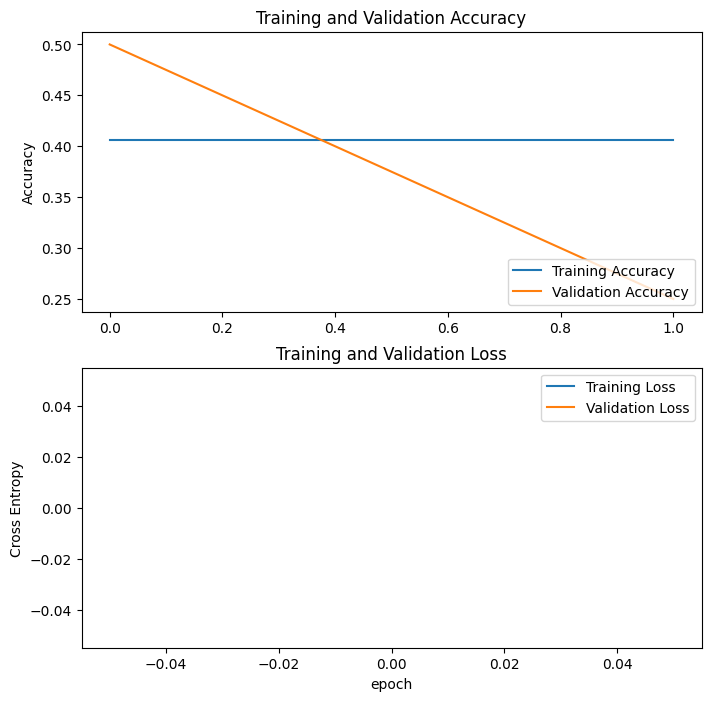

AttributeError: ignored

In [ ]:
acc = history_bert.history['accuracy']
val_acc = history_bert.history['val_accuracy']

loss = history_bert.history['loss']
val_loss = history_bert.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

test_loss, test_acc = history_bert.evaluate(tf_dataset_test, verbose = 2)
print('Test accuracy :', test_acc)

In [ ]:
test_sentence = "This is a really good movie. I loved it and will watch again"
text = "Everything was great! Food, menu options, staff & vibe. It's nice to have a traditional Italian restaurant that isn't stuffy or way over priced"
# text = "The squid starters were mediocre. But the barbecue pizza we ordered was delicious."

predict_input = tokenizer.encode(text, truncation=True, padding=True, return_tensors="tf")

tf_output = bert_model.predict(predict_input)[0]
tf_prediction = tf.nn.softmax(tf_output, axis=1)
labels = ['Negative','Neutral','Positive'] #(0:negative, 1:neutral, 2:positive)
label = tf.argmax(tf_prediction, axis=1)
label = label.numpy()
print(labels[label[0]])